## "Target Profile of Players Who Contribute the Most Data"

### Ella Bailey, Jayden Chen, Peter Wojnicki, Vanshika Dixit
### Introduction:

<p style="text-indent: 40px;"> A research group in the Department of Computer Science at UBC is studying how
people interact within a virtual environment. To collect data, researchers were able to gather a
wide variety of people and put them all into a Minecraft server in order to document their
actions. Data that was collected from this experiment included the players name, age, skill level,
gender, forum subscription status, hours played and previous experience in the game.
Additionally, researchers were also able to collect exact dates and time players logged into and
off the Minecraft server. The goal of this research server is to help identify various patterns of
engagement between the type of players and the hours spent in the game.

<p style="text-indent: 40px;">Although there are many ways to interpret and analyze patterns in the data, we have
chosen to target the question of: Which types of players are most likely to contribute to
large amounts of data on the Minecraft research server? More specifically, we aim to
examine whether certain player characteristics like age, total hours played, and typical session
lengths are associated with higher levels of activity inside of the Minecraft server.
Understanding the demographic of people who contribute the most with data collection helps us
better understand the traits, like age ranges, that could be strongly correlated with higher
engagement.

<p style="text-indent: 40px;">To address this question we used the players.csv and sessions.csv dataset to see the
demographic and behavior related to overall activity levels. The player.csv dataset, contains a
total of 196 observations and seven different variables documenting the players age, gender,
experience level, hours played and subscription status. The sessions.csv file contains 1535
observations and five variables that describe the start and end times of each gameplay session,
including timestamps. Using these two files together lets us see both who the players are and
how long they actually spent playing, which lets us figure out the type of plays which contribute
the most to the data.

### Methods & Results:

<center><b>Table 1.</b> Overview of Data with Number of Columns and Observations</center>

| Source File Name | Number of Columns | Total Number of Observations |
|:-:|:-:|:-:|
|players.csv| 7 | 196 |
|sessions.csv| 5 | 1535 | 


<center><b>Table 2.</b> Summary statistics for variables of interest</center>

| Variable Name | Mean | Median | Minimum | Maximum | Number of Observations |
|:-:|:-:|:-:|:-:|:-:|:-:|
|Player Age (years) | 21.14 | 19 | 9 | 58 | 196 |
|Played Hours (hours) | 5.85 | 0.1 | 0 | 223.1 | 196 |
|Elapsed Session Time (minutes) | 50.86 | 30 | 3 | 259 | 1535 |
|Start Date (Month Day)| June 24 | June 24 | April 06 | Sept 26 | 1535 |
|End Date (Month Day)| June 24 | June 23 | April 06 | Sept 26 | 1535 |

* describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
    * loads data 
    * wrangles and cleans the data to the format necessary for the planned analysis
    * performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    * creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    * performs the data analysis
    * creates a visualization of the analysis
       
* note: all figures should have a figure number and a legend
### Discussion:
* summarize what you found
* discuss whether this is what you expected to find
* discuss what impact could such findings have
* discuss what future questions could this lead to
### References
Timbers, T., Campbell, T., & Lee, M. (2022). Data Science: A First Introduction (1st ed.). Chapman & Hall/CRC. https://doi.org/10.1201/9781003080978

In [2]:
### Run this cell before continuing.
library(tidyverse)
library(tidymodels)
library(tidyclust)
library(repr)
library(GGally)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Read the Datasets from URLs

In [3]:
players_data <- read_csv("https://raw.githubusercontent.com/wojpc/dsci100-project-008-group09/refs/heads/main/Data/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/wojpc/dsci100-project-008-group09/refs/heads/main/Data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
players_data
sessions_data

experience subscribe
1   Pro         TRUE    
2   Veteran     TRUE    
3   Veteran    FALSE    
⋮   ⋮          ⋮        
194 Amateur    FALSE    
195 Amateur    FALSE    
196 Pro         TRUE    
    hashedEmail                                                     
1   f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d
2   f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9
3   b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28
⋮   ⋮                                                               
194 d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb
195 f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436
196 d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11
    played_hours name      gender            Age
1   30.3         Morgan    Male               9 
2    3.8         Christian Male              17 
3    0.0         Blake     Male              17 
⋮   ⋮            ⋮         ⋮                 ⋮  
194 0.0          Dylan     Prefer not to say 57 
195 2.3          Harlow    Male              17 
196 0.2          Ahmed     Other             NA

hashedEmail                                                     
1    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2    36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3    f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
⋮    ⋮                                                               
1533 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1534 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1535 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
     start_time       end_time         original_start_time original_end_time
1    30/06/2024 18:12 30/06/2024 18:24 1.71977e+12         1.71977e+12      
2    17/06/2024 23:33 17/06/2024 23:46 1.71867e+12         1.71867e+12      
3    25/07/2024 17:34 25/07/2024 17:57 1.72193e+12         1.72193e+12      
⋮    ⋮                ⋮                ⋮                   ⋮                
1533 28/07/2024 15:36 28/07/2024 15:57 1.72218e+12         1.72218e+12      
1534 25/07/2024 06:15 25/07/2024 06:22 1.72189e+12         1.72189e+12      
1535 20/05/2024 02:26 20/05/2024 02:45 1.71617e+12         1.71617e+12

#### Left Join Data on Hashed Email and Wrangle Time
A new column called session_time is added to show elapsed time of session and times are converted from strings to more usable data. Sessions data is now combined with player information. original_start_time and original_end_time were useless so I removed them to make the table tidier and less redundant. 

In [5]:
sessions_players_joined <- sessions_data |>
  left_join(players_data, by = "hashedEmail")

sessions_players_elapsed <- sessions_players_joined |>
    mutate(end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"),
           start_time =  as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")) |>
    mutate(session_time_elapsed = as.numeric(end_time - start_time)) |>
    select(-original_start_time, -original_end_time)

sessions_players_elapsed

hashedEmail                                                     
1    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2    36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3    f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
⋮    ⋮                                                               
1533 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1534 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1535 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
     start_time          end_time            experience subscribe played_hours
1    2024-06-30 18:12:00 2024-06-30 18:24:00 Regular    TRUE      223.1       
2    2024-06-17 23:33:00 2024-06-17 23:46:00 Amateur    TRUE       53.9       
3    2024-07-25 17:34:00 2024-07-25 17:57:00 Amateur    TRUE      150.0       
⋮    ⋮                   ⋮                   ⋮          ⋮         ⋮           
1533 2024-07-28 15:36:00 2024-07-28 15:57:00 Amateur    TRUE      56.1        
1534 2024-07-25 06:15:00 2024-07-25 06:22:00 Amateur    TRUE      56.1        
1535 2024-05-20 02:26:00 2024-05-20 02:45:00 Amateur    TRUE      53.9        
     name    gender Age session_time_elapsed
1    Hiroshi Male   17  12                  
2    Alex    Male   17  13                  
3    Delara  Female 16  23                  
⋮    ⋮       ⋮      ⋮   ⋮                   
1533 Dana    Male   23  21                  
1534 Dana    Male   23   7                  
1535 Alex    Male   17  19

#### Preliminary Visualizations

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


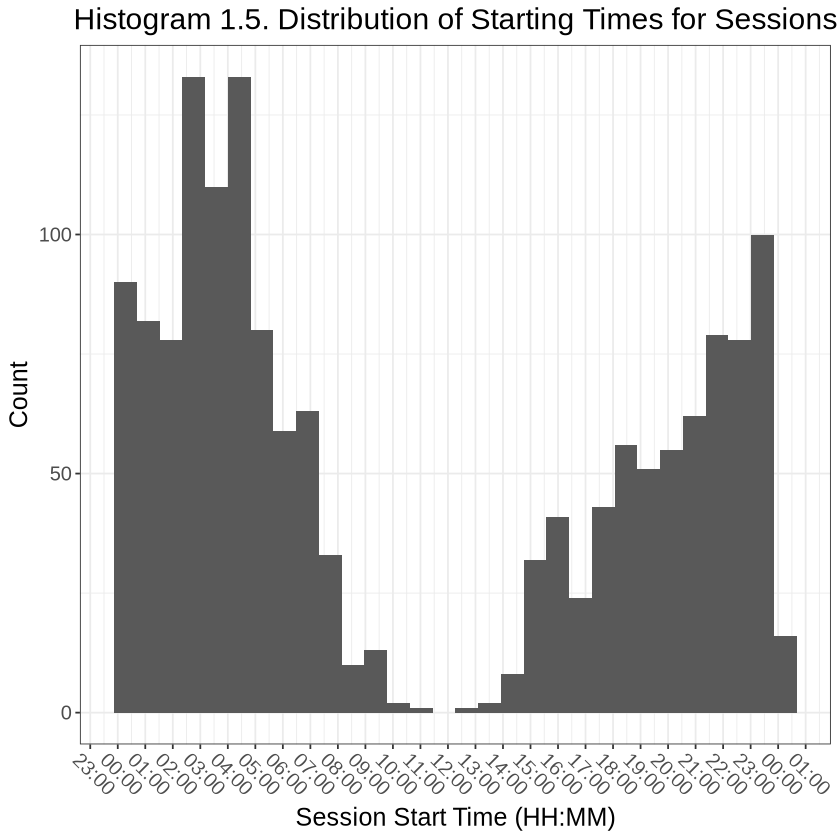

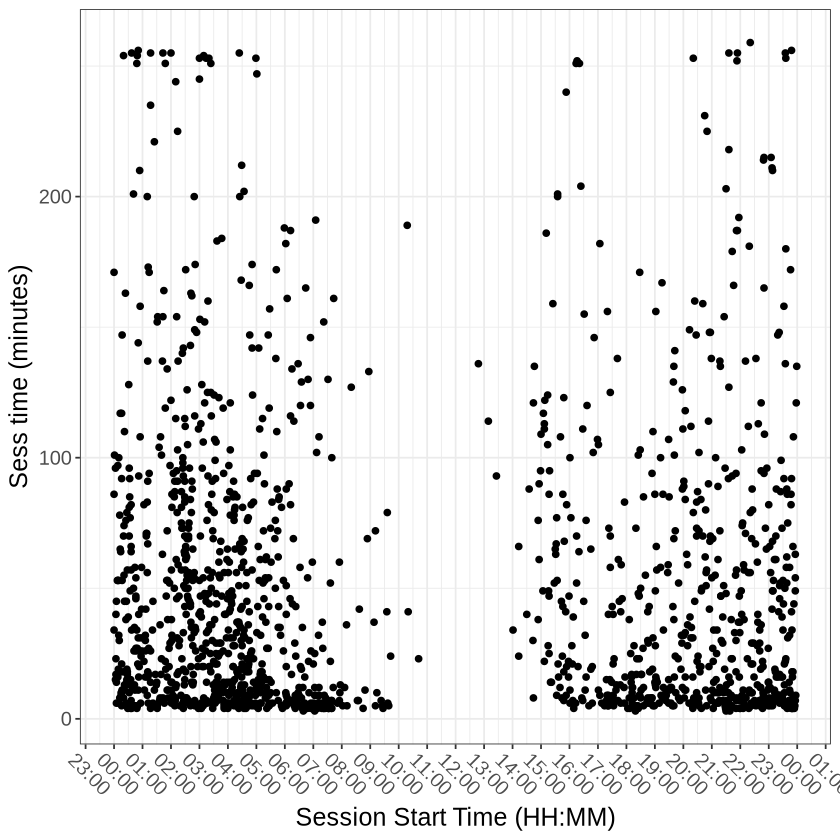

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


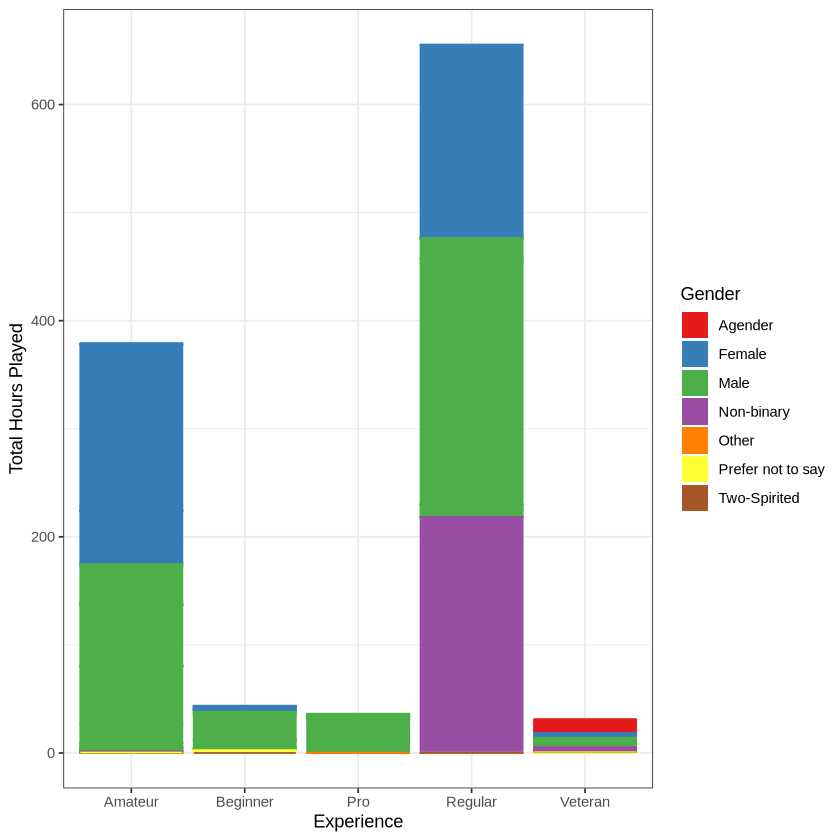

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


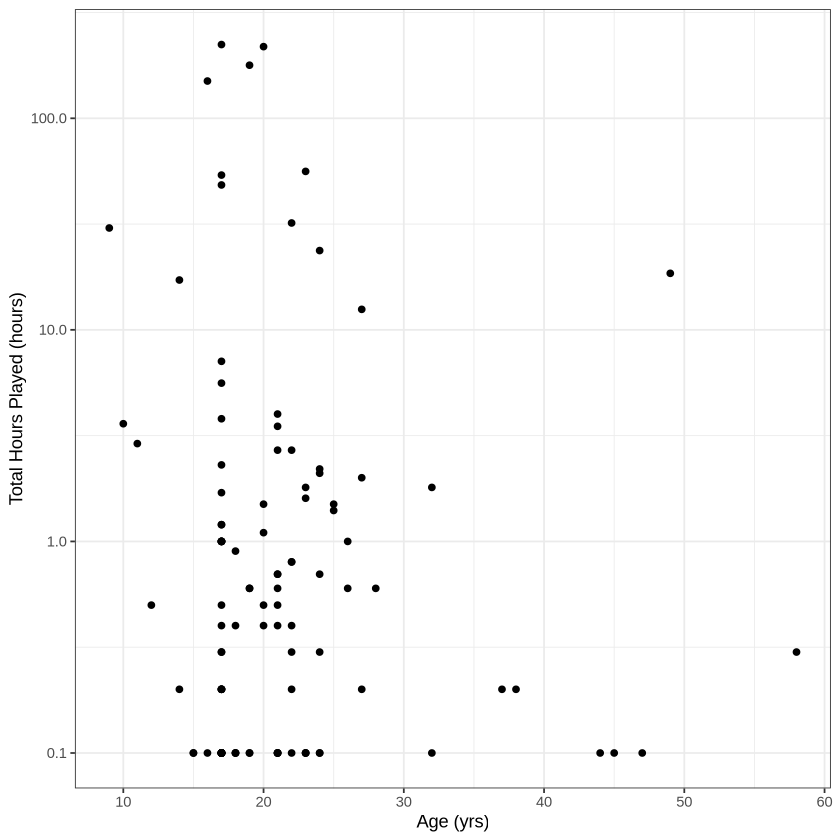

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 4 rows containing missing values”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


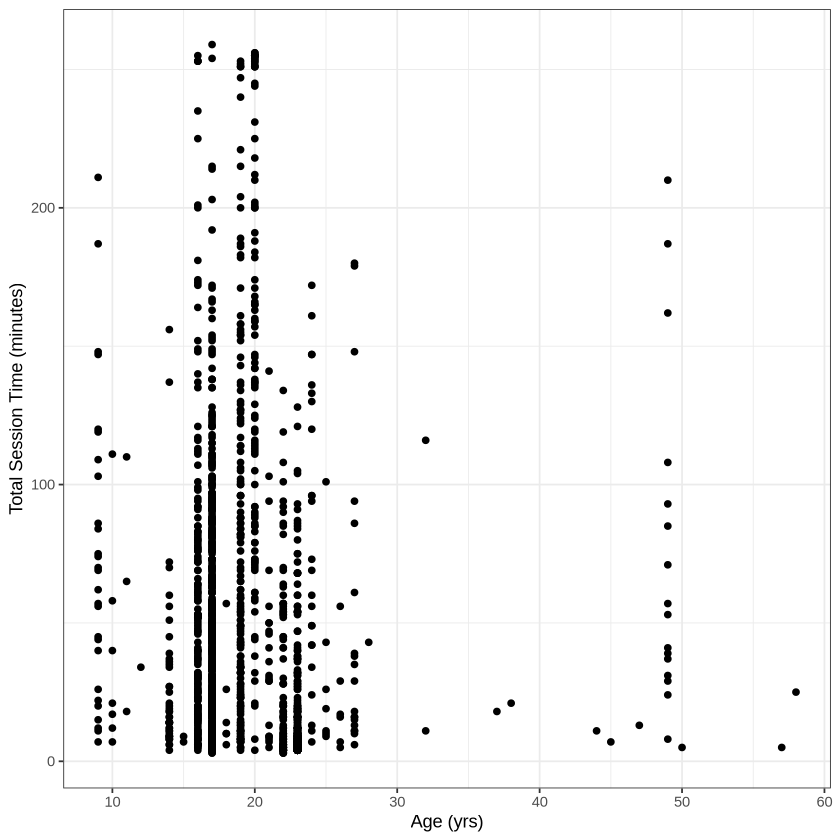

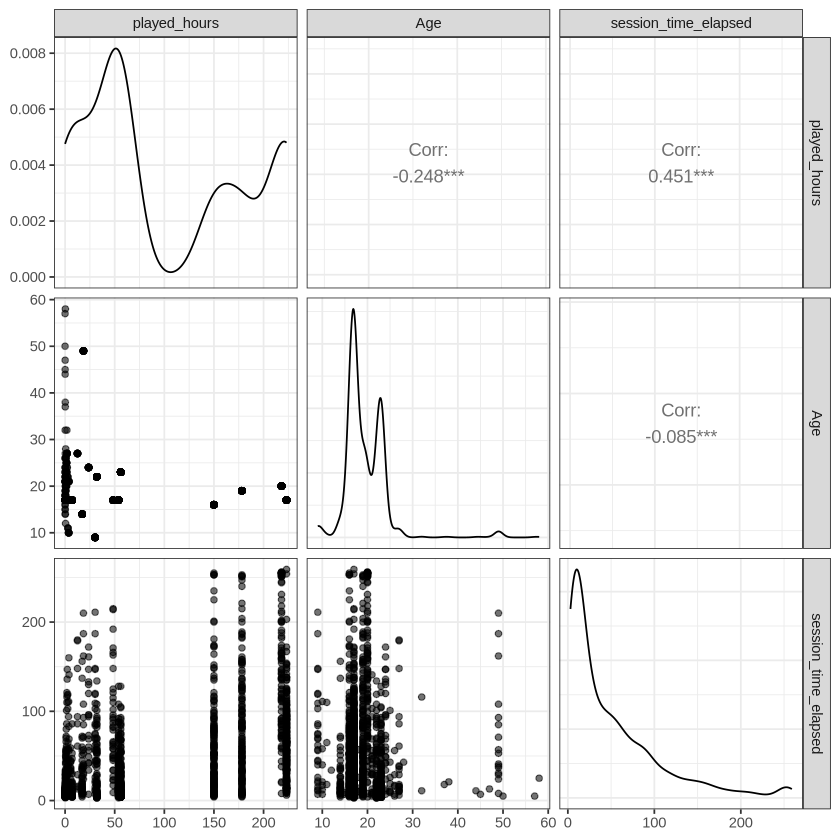

In [5]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Scatterplot of age and total hours played
players_data1 <- filter(players_data, played_hours > 0)
age_vs_hours <- ggplot(players_data1, aes(x = Age, y = played_hours)) +
        geom_point() +
        labs(x = "Age (yrs)",
             y = "Total Hours Played (hours)") +
        scale_y_log10() + theme_bw()

# Scatterplot of age and session time
sessions_players_elapsed1 <- filter(sessions_players_elapsed, session_time_elapsed > 0)
age_vs_sesstime <- ggplot(sessions_players_elapsed1, aes(x = Age, y = session_time_elapsed)) +
        geom_point() +
        labs(x = "Age (yrs)",
             y = "Total Session Time (minutes)") + theme_bw()

# Bar graph of experience and total hours played with gender as fill
players_data_col <- select(players_data, experience, played_hours, gender)
experience_playtime <- ggplot(players_data_col, aes(x = experience, 
                                                y = played_hours,
                                                color = gender,
                                                fill = gender)) +
        geom_col() +
        labs(x = "Experience",
             y = "Total Hours Played",
             fill = "Gender") +
        scale_fill_brewer(palette = "Set1") +
        scale_color_brewer(palette = "Set1") +
        guides(color = "none") + theme_bw()

# ggpairs plot of quantitative variables
player_pairs <- sessions_players_elapsed |> select(played_hours, Age, session_time_elapsed) |>
    ggpairs(aes(alpha = 0.05)) +
    theme(text = element_text(size = 20)) + theme_bw() 

# Isolate the times when playing starts and ignore dates
starting_times <- sessions_players_elapsed |>
    mutate(start_times = as.POSIXct(format(start_time, "%H:%M"),
      format = "%H:%M", tz = "UTC"),
          feature_sin = sin(2 * pi * hour(start_times) / 24),
feature_cos = cos(2 * pi * hour(start_times) / 24))

# Histogram of session start times
session_time_plot2 <- starting_times |> 
    ggplot(aes(x = start_times)) +
    geom_histogram() +
    labs(x = "Session Start Time (HH:MM)",
        y = "Count",
        title = "Histogram 1.5. Distribution of Starting Times for Sessions") +
    scale_x_datetime(date_labels = "%H:%M",
                    date_breaks = "1 hour") +
    theme_bw() +
    theme(text = element_text(size = 15),
         plot.title = element_text(hjust = 0.5),
         axis.text.x = element_text(angle = -45,
                                  vjust = 0.1))

# Scatterplot of start times and session lengths
start_vs_sesslen <- ggplot(starting_times, aes(x = start_times, y = session_time_elapsed)) +
        geom_point() +
        labs(x = "Session Start Time (HH:MM)",
             y = "Sess time (minutes)") +
        scale_x_datetime(date_labels = "%H:%M",
                         date_breaks = "1 hour") + theme_bw() +
theme(text = element_text(size = 15),
         plot.title = element_text(hjust = 0.5),
         axis.text.x = element_text(angle = -45,
                                  vjust = 0.1))


session_time_plot2
start_vs_sesslen
experience_playtime
age_vs_hours
age_vs_sesstime
player_pairs

#### kNN Means Clustering for Total Hours Played

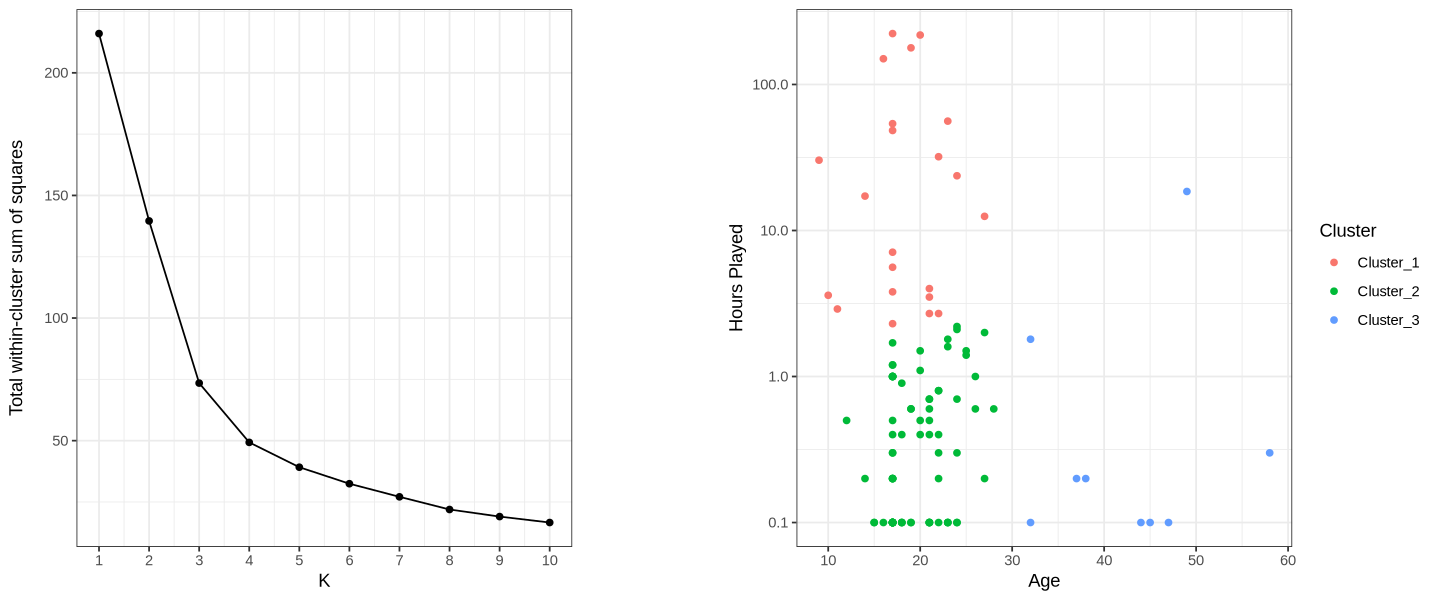

In [6]:
# Set seed for consistent reproduction 
set.seed(888)

# Plot size
options(repr.plot.width = 12, repr.plot.height = 5)

## Tune for best k##
total_played_clustdata <- players_data |> 
    select(Age, played_hours) |> 
    filter(played_hours > 0) |>
    filter(!is.na(Age))

total_played_recipe <- recipe(~ ., total_played_clustdata) |>
    step_log(played_hours, base = 10) |>
    step_scale(all_predictors(), na_rm = TRUE) |>
    step_center(all_predictors(), na_rm = TRUE)

ks <- tibble(num_clusters = 1:10) 

player_spec_nstart <- k_means(num_clusters = tune()) |>
    set_engine("stats", nstart = 100)

elbow_stats <- workflow() |>
    add_recipe(total_played_recipe) |>
    add_model(player_spec_nstart) |>
    tune_cluster(resamples = apparent(total_played_clustdata), grid = ks) |>
    collect_metrics() |>
    filter(.metric == "sse_within_total") |>
    mutate(total_WSSD = mean) |>
    select(num_clusters, total_WSSD)
    
elbow_plot <- elbow_stats |>
    ggplot(aes(x = num_clusters, y = total_WSSD)) +
    geom_point() +
    geom_line() +
    labs(x = "K",
        y = "Total within-cluster sum of squares") +
    theme(text = element_text(size = 15)) +
    scale_x_continuous(breaks = 1:10)

## Clustering with Optimal K ##
total_played_spec <- k_means(num_clusters = 3) |>
    set_engine("stats")

total_played_clustering <- workflow() |>
    add_recipe(total_played_recipe) |>
    add_model(total_played_spec) |>
    fit(data = total_played_clustdata)

clustered_players <- augment(total_played_clustering, total_played_clustdata)

clustering_plot <- clustered_players |>
    ggplot(aes(x = Age, y = played_hours, color = .pred_cluster)) +
    geom_point() +
    labs(x = "Age",
        y = "Hours Played",
        color = "Cluster") +
    scale_y_log10()

plot_grid(elbow_plot + theme_bw(), clustering_plot + theme_bw(), align = "hv")

#### kNN Means Clustering for Session Times

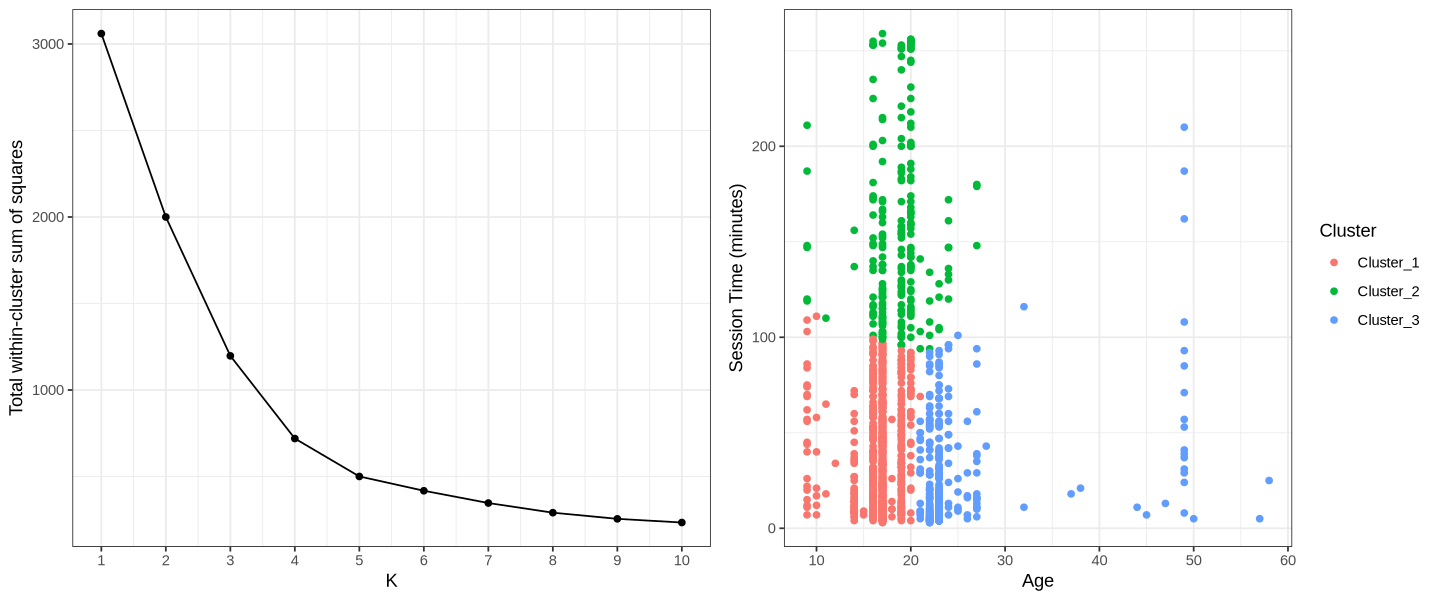

In [7]:
# Set seed for consistent reproduction 
set.seed(888)

# Plot size
options(repr.plot.width = 12, repr.plot.height = 5)

## Tune for best k##
sess_clustdata <- sessions_players_elapsed |> 
    select(Age, session_time_elapsed) |>
     filter(!is.na(Age), !is.na(session_time_elapsed))

sess_recipe <- recipe(~ ., sess_clustdata) |>
    step_scale(all_predictors(), na_rm = TRUE) |>
    step_center(all_predictors(), na_rm = TRUE)

ks <- tibble(num_clusters = 1:10) 

sess_spec_nstart <- k_means(num_clusters = tune()) |>
    set_engine("stats", nstart = 100)

elbow_stats_sess <- workflow() |>
    add_recipe(sess_recipe) |>
    add_model(sess_spec_nstart) |>
    tune_cluster(resamples = apparent(sess_clustdata), grid = ks) |>
    collect_metrics() |>
    filter(.metric == "sse_within_total") |>
    mutate(total_WSSD = mean) |>
    select(num_clusters, total_WSSD)
    
elbow_plot_sess <- elbow_stats_sess |>
    ggplot(aes(x = num_clusters, y = total_WSSD)) +
    geom_point() +
    geom_line() +
    labs(x = "K",
        y = "Total within-cluster sum of squares") +
    theme(text = element_text(size = 15)) +
    scale_x_continuous(breaks = 1:10)

## Clustering with Optimal K ##
sess_spec <- k_means(num_clusters = 3) |>
    set_engine("stats")

sess_clustering <- workflow() |>
    add_recipe(sess_recipe) |>
    add_model(sess_spec) |>
    fit(data = sess_clustdata)

clustered_sess <- augment(sess_clustering, sess_clustdata)

clustering_plot_sess <- clustered_sess |>
    ggplot(aes(x = Age, y = session_time_elapsed, color = .pred_cluster)) +
    geom_point() +
    labs(x = "Age",
        y = "Session Time (minutes)",
        color = "Cluster")


plot_grid(elbow_plot_sess + theme_bw(), clustering_plot_sess + theme_bw())

#### Clustering for Age, Session Time and Total Play Time

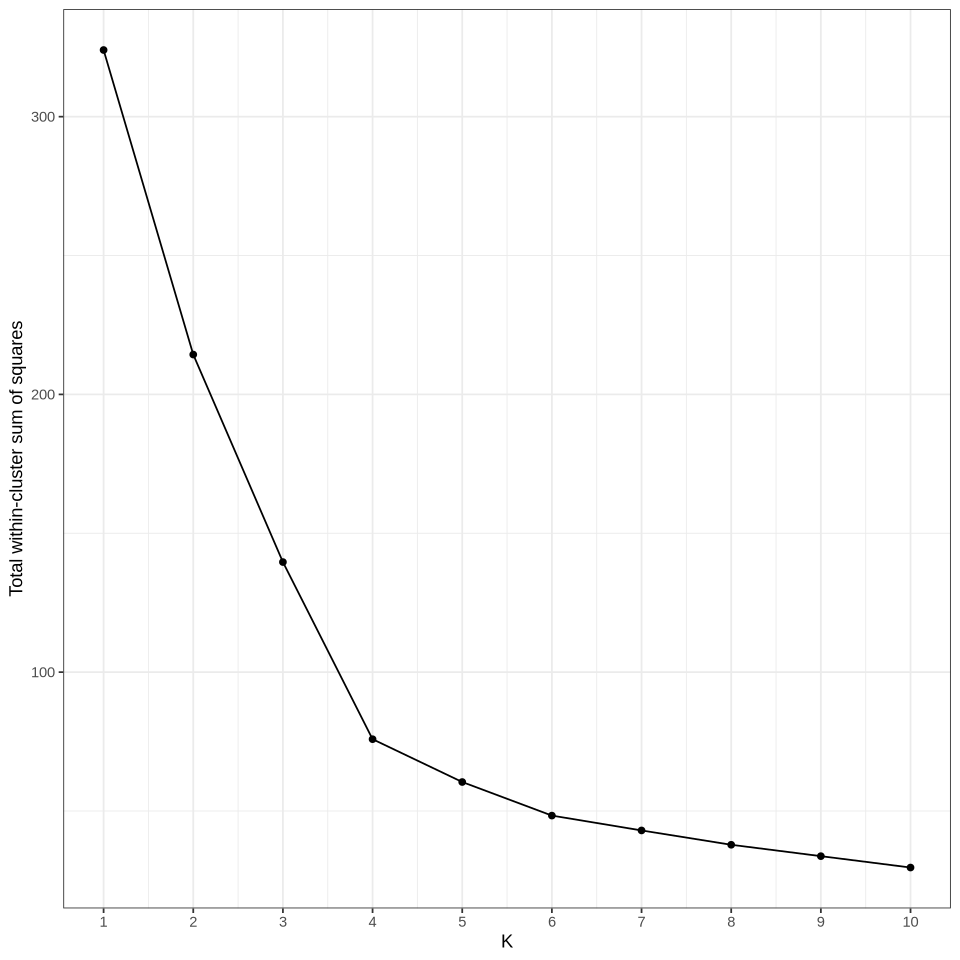

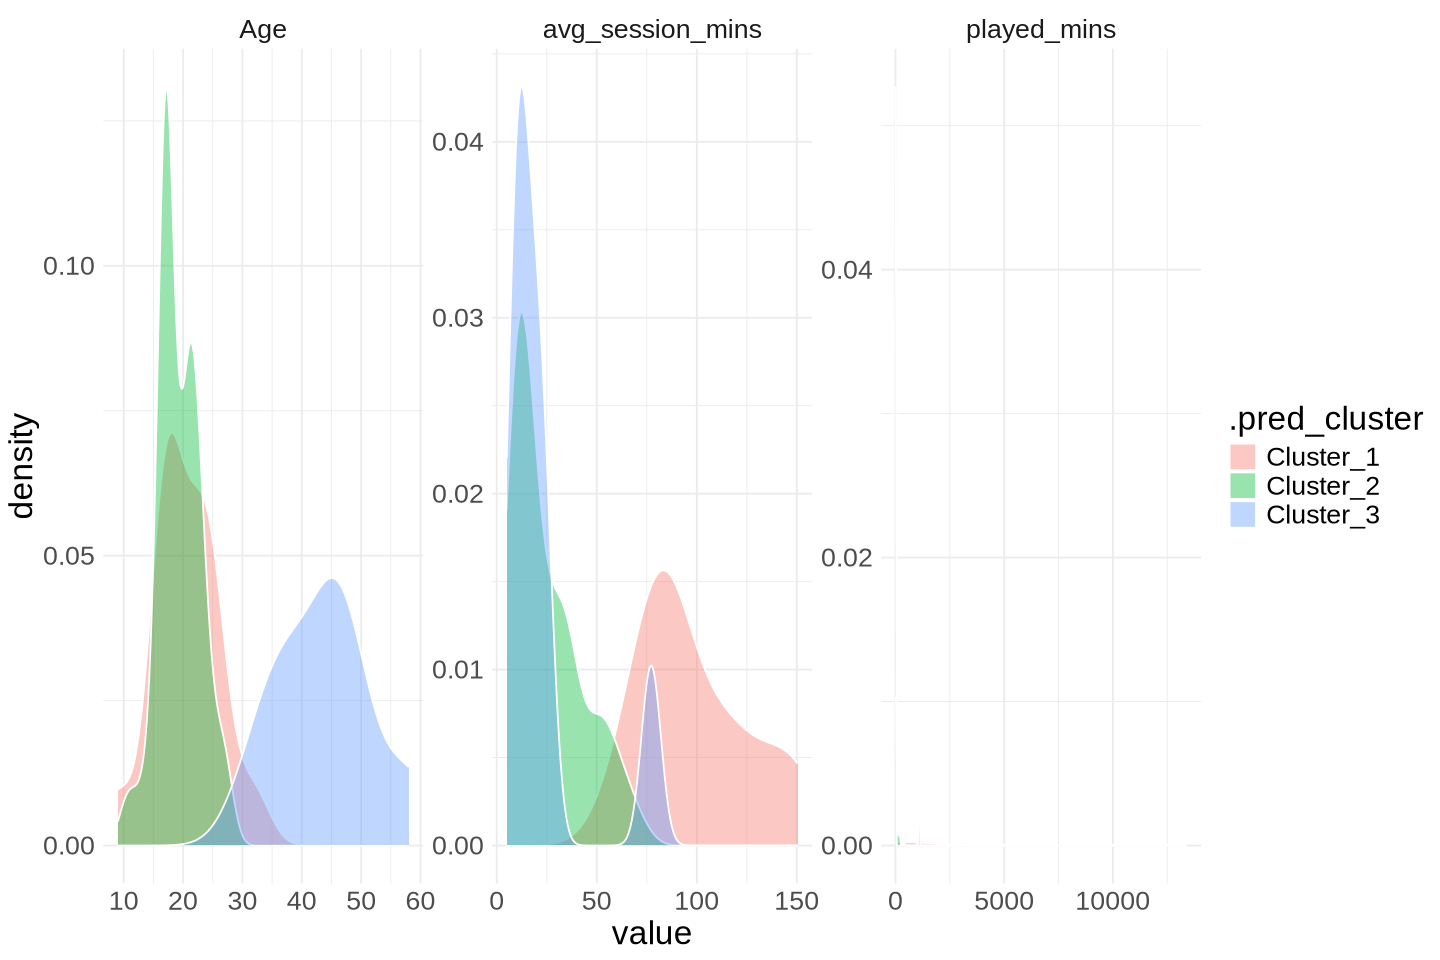

In [26]:
# Set seed for consistent reproduction 
set.seed(888)

#Plot size
options(repr.plot.width = 8, repr.plot.height = 8)

## Tune for best k ##
avg_sesstime <- sessions_players_elapsed |>
    select(name, Age, session_time_elapsed, played_hours) |>
    filter(!is.na(Age), 
           !is.na(session_time_elapsed), 
           !is.na(played_hours),
           !is.nan(played_hours)) |>
    filter(played_hours > 0) |>
    group_by(name) |>
    summarize(avg_session_mins = mean(session_time_elapsed))

ast_clustdata <- left_join(players_data, avg_sesstime, by = "name") |> 
    filter(!is.na(avg_session_mins)) |> 
    mutate(played_mins = played_hours * 60) |>
    select(Age, played_mins, avg_session_mins)

#ast_clustdata

ast_recipe <- recipe(~ ., ast_clustdata) |>
    step_scale(all_predictors(), na_rm = TRUE) |>
    step_center(all_predictors(), na_rm = TRUE)

ks <- tibble(num_clusters = 1:10) 

ast_spec_nstart <- k_means(num_clusters = tune()) |>
    set_engine("stats", nstart = 100)

elbow_stats_ast <- workflow() |>
    add_recipe(ast_recipe) |>
    add_model(ast_spec_nstart) |>
    tune_cluster(resamples = apparent(ast_clustdata), grid = ks) |>
    collect_metrics() |>
    filter(.metric == "sse_within_total") |>
    mutate(total_WSSD = mean) |>
    select(num_clusters, total_WSSD)
    
elbow_plot_ast <- elbow_stats_ast |>
    ggplot(aes(x = num_clusters, y = total_WSSD)) +
    geom_point() +
    geom_line() +
    labs(x = "K",
        y = "Total within-cluster sum of squares") +
    theme(text = element_text(size = 15)) +
    scale_x_continuous(breaks = 1:10) + theme_bw()

## Clustering with Optimal K ##
ast_spec <- k_means(num_clusters = 3) |>
    set_engine("stats")

ast_clustering <- workflow() |>
    add_recipe(ast_recipe) |>
    add_model(ast_spec) |>
    fit(data = ast_clustdata)

clustered_sess <- augment(ast_clustering, ast_clustdata)

clustered_sess_density <- clustered_sess  |>
    pivot_longer(cols = -.pred_cluster, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = .pred_cluster)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))

elbow_plot_ast

options(repr.plot.width = 12, repr.plot.height = 8)
clustered_sess_density

#### Bootstrapping and Inference for the Mean with 99% Confidence Interval

[1] 21.13918

0.5%    99.5% 
19.82390 22.63523

[1] 5.845918

0.5%     99.5% 
 1.704495 11.819737

[1] 50.85845

0.5%    99.5% 
47.46310 54.42339

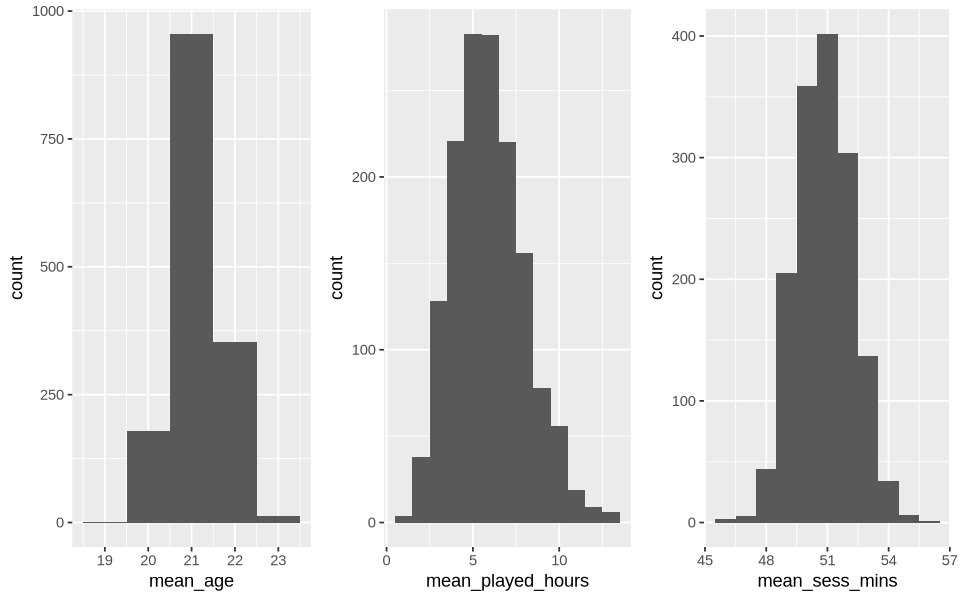

In [11]:
# Set seed for consistent reproduction 
set.seed(888)
options(repr.plot.width = 8, repr.plot.height = 5)

## Age
age_mean <- mean(players_data$Age, na.rm = TRUE)

ages <- players_data |>
        filter(!is.na(Age))|>
        select(Age)

samples_age <- rep_sample_n(ages, size = 196, reps = 1500, replace = TRUE) |>
    group_by(replicate) |>
    summarize(mean_age = mean(Age))

age_mean

age_bootplot <- ggplot(samples_age, aes(x = mean_age)) +
    geom_histogram(binwidth = 1)

samples_age |> 
    select(mean_age) |> 
    pull() |>
    quantile(c(0.005, 0.995))

## Hours Played
played_mean <- mean(players_data$played_hours, na.rm = TRUE)

played_data <- players_data |>
        filter(!is.na(played_hours))|>
        select(played_hours)

samples_played <- rep_sample_n(played_data, size = 196, reps = 1500, replace = TRUE) |>
    group_by(replicate) |>
    summarize(mean_played_hours = mean(played_hours))

played_mean

played_bootplot <- ggplot(samples_played, aes(x = mean_played_hours)) +
    geom_histogram(binwidth = 1)

samples_played |> 
    select(mean_played_hours) |> 
    pull() |>
    quantile(c(0.005, 0.995))

## Session Time (Minutes)
sess_mean <- mean(sessions_players_elapsed$session_time_elapsed, na.rm = TRUE)

sess_data <- sessions_players_elapsed |>
        filter(!is.na(session_time_elapsed))|>
        select(session_time_elapsed)

samples_sess <- rep_sample_n(sess_data, size = 1533, reps = 1500, replace = TRUE) |>
    group_by(replicate) |>
    summarize(mean_sess_mins = mean(session_time_elapsed))

sess_mean

sess_bootplot <- ggplot(samples_sess, aes(x = mean_sess_mins)) +
    geom_histogram(binwidth = 1)

samples_sess |> 
    select(mean_sess_mins) |> 
    pull() |>
    quantile(c(0.005, 0.995))

plot_grid(age_bootplot, played_bootplot, sess_bootplot, ncol = 3)

#### kNN Classification for Experience

.metric  .estimator .estimate  
1 accuracy multiclass  0.17500000
2 kap      multiclass -0.08196721

          Truth
Prediction Pro Veteran Amateur Regular Beginner
  Pro        0       0       1       0        0
  Veteran    0       0       2       3        1
  Amateur    0       6       4       0        3
  Regular    1       3       5       1        2
  Beginner   1       1       2       2        2

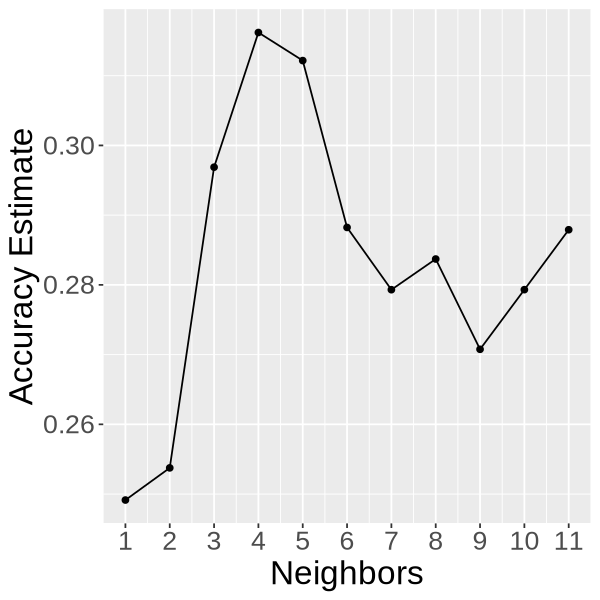

In [10]:
# Set seed for consistent reproduction 
set.seed(888)
options(repr.plot.width = 5, repr.plot.height = 5)

players_data_factored <- players_data |>
                         mutate(experience = as_factor(experience)) |>
                         select(experience, Age, played_hours) |>
                         filter(!is.na(experience), !is.na(Age), !is.na(played_hours))

players_split <- initial_split(players_data_factored, prop = 4/5, strata = experience)
players_training <- training(players_split)
players_testing <- testing(players_split)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

players_recipe <- recipe(experience ~ Age + played_hours, data = players_training) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())

players_vfold <- vfold_cv(players_training, v = 3, repeats = 3, strata = experience)

knn_results <- workflow() |>
                 add_recipe(players_recipe) |>
                 add_model(knn_spec_tune) |>
                 tune_grid(resamples = players_vfold, grid = tibble(neighbors = seq(1, 11, 1))) |>
                 collect_metrics()

accuracies <- knn_results |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) +
                  scale_x_continuous(breaks = seq(1, 12, 1))
cross_val_plot


knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit <- workflow() |>
           add_recipe(players_recipe) |>
           add_model(knn_spec) |>
           fit(data = players_training)

player_predictions <- predict(knn_fit, players_testing) |>
                        bind_cols(players_testing)

player_metrics <- player_predictions |> metrics(truth = experience, estimate = .pred_class)

player_conf_mat <- player_predictions |>
                        conf_mat(truth = experience, estimate = .pred_class) 
player_metrics
player_conf_mat

#### Linear Regression for Total Played Minutes Based on Age and Average Session Time

In [59]:
# Set seed for consistent reproduction 
set.seed(1234)

playersess_split <- initial_split(ast_clustdata , prop = 3/4, strata = played_mins)
training_players <- training(playersess_split)
testing_players <- testing(playersess_split)

lm_spec <- linear_reg(mode = "regression", 
                      engine = "lm")

lm_recipe <- recipe(played_mins ~ Age + avg_session_mins, data = training_players)

lm_fit <- workflow() |>
      add_recipe(lm_recipe) |>
      add_model(lm_spec) |>
      fit(training_players)
lm_fit

lm_rmse <- lm_fit |>
        predict(training_players) |>
        bind_cols(training_players) |>
        metrics(truth = played_mins, estimate = .pred) |>
        filter(.metric == "rmse") |>
        select(.estimate) |>
        pull()
lm_rmse

player_fit_testing <- workflow() |>
    add_recipe(lm_recipe) |>
    add_model(lm_spec) |>
    fit(testing_players)

lm_rmspe <- player_fit_testing |>
        predict(testing_players) |>
        bind_cols(testing_players) |>
        metrics(truth = played_mins, estimate = .pred) |>
        filter(.metric == "rmse") |>
        select(.estimate) |>
        pull()

lm_rmspe

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
     (Intercept)               Age  avg_session_mins  
          420.89            -33.43             27.94  


[1] 2337.868

[1] 726.4859

#### kNN Regression for Total Played Minutes Based on Age and Average Session Time

In [63]:
# Set seed for consistent reproduction 
set.seed(888)

## Note: Reusing training and testing set from linear regression

knnreg_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |> 
      set_engine('kknn') |>
      set_mode('regression') 

knnreg_recipe <- recipe(played_mins ~ Age + avg_session_mins, data = training_players) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors()) 

players_reg_vfold <- vfold_cv(training_players, 5)

players_reg_workflow <- workflow() |>
    add_recipe(knnreg_recipe) |>
    add_model(knnreg_spec)

neighbors <- seq(1,50,1)
gridvals <- tibble(neighbors)
players_results <- players_reg_workflow |>
  tune_grid(resamples = players_reg_vfold, grid = gridvals) |>
  collect_metrics()

players_min <- players_results |>
   filter(.metric == 'rmse') |>
   slice_min(std_err)

players_min

k_reg_min <- players_min |> pull(neighbors)

knnreg_spec8 <- nearest_neighbor(weight_func = 'rectangular', neighbors = k_reg_min) |> 
      set_engine('kknn') |>
      set_mode('regression') 

players_best_fit <- workflow() |>
         add_recipe(knnreg_recipe) |>
         add_model(knnreg_spec8) |>
         fit(data = training_players)

players_reg_summary <- players_best_fit |>
          predict(testing_players) |>
          bind_cols(testing_players) |>
          metrics(truth = played_mins, estimate = .pred)

players_reg_summary 

neighbors .metric .estimator mean     n std_err  .config              
1 1         rmse    standard   4054.081 5 405.4448 Preprocessor1_Model01

.metric .estimator .estimate   
1 rmse    standard   1.250883e+03
2 rsq     standard   6.139709e-03
3 mae     standard   6.139286e+02